## Importing the Libraries

In [254]:
import numpy as np
import pandas as pd

## Reading the Datasets

In [255]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 430 Machine Learning/InClassAssignmentMLP/data.csv")

In [256]:
validate = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 430 Machine Learning/InClassAssignmentMLP/Validate.csv")

## Exploring the Dataset

In [257]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [258]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                564 non-null    object 
 1   radius_mean              564 non-null    float64
 2   texture_mean             564 non-null    float64
 3   perimeter_mean           564 non-null    float64
 4   area_mean                564 non-null    float64
 5   smoothness_mean          564 non-null    float64
 6   compactness_mean         564 non-null    float64
 7   concavity_mean           564 non-null    float64
 8   concave points_mean      564 non-null    float64
 9   symmetry_mean            564 non-null    float64
 10  fractal_dimension_mean   564 non-null    float64
 11  radius_se                564 non-null    float64
 12  texture_se               564 non-null    float64
 13  perimeter_se             564 non-null    float64
 14  area_se                  5

## Splitting the Dataset

In [259]:
x = dataset.drop(['diagnosis'], axis = 1)
y = dataset['diagnosis']

## Label Encoder

In [260]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Train_Test_Split

In [261]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Standard Scaler

In [262]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Building an ANN Model

In [263]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [264]:
n_features = x_train.shape[1]
print(n_features)

30


In [265]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = (n_features, )))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## Compiling the Model

In [266]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the Model

In [267]:
history = model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test), batch_size = 32, verbose = 0)

## Model Validation

In [268]:
loss, acc = model.evaluate(x_test, y_test, verbose = 0)
print(f"Loss Value: {loss}, Accuracy Value: {acc}")

Loss Value: 0.05410660803318024, Accuracy Value: 0.9646017551422119


## Plotting the Accuracy and Loss Scores

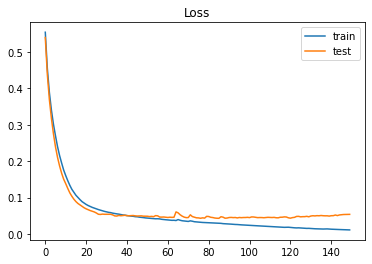

In [269]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

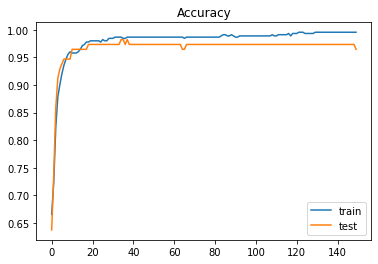

In [270]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

## Confusion Matrix and Classification Report

In [271]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


In [272]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 1, 44]])

In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.94      0.98      0.96        45

    accuracy                           0.96       113
   macro avg       0.96      0.97      0.96       113
weighted avg       0.97      0.96      0.96       113



## Predicting Validate Cases

In [274]:
valid_list = validate.values.tolist()
print(valid_list)

[['M', 14.68, 20.13, 94.74, 684.5, 0.09867, 0.072, 0.07395, 0.05259, 0.1586, 0.05922, 0.4727, 1.24, 3.195, 45.4, 0.005718, 0.01162, 0.01998, 0.01109, 0.0141, 0.002085, 19.07, 30.88, 123.4, 1138.0, 0.1464, 0.1871, 0.2914, 0.1609, 0.3029, 0.08216], ['M', 16.13, 20.68, 108.1, 798.8, 0.117, 0.2022, 0.1722, 0.1028, 0.2164, 0.07356, 0.5692, 1.073, 3.854, 54.18, 0.007026, 0.02501, 0.03188, 0.01297, 0.01689, 0.004142, 20.96, 31.48, 136.8, 1315.0, 0.1789, 0.4233, 0.4784, 0.2073, 0.3706, 0.1142], ['M', 19.81, 22.15, 130.0, 1260.0, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398.0, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615], ['B', 13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259], ['B', 13.08, 15

In [278]:
for i in range (0,5):
  data = valid_list[i][1:]
  if (model.predict(sc_x.transform([data])) > 0.5):
    print("Result: B")
  else:
    print("Result: M")



1/1 [==============================] - 0s 17ms/step
Result: B
1/1 [==============================] - 0s 19ms/step
Result: B
1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Result: B
1/1 [==============================] - 0s 18ms/step
Result: M
1/1 [==============================] - 0s 41ms/step
Result: M


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [276]:
loss, acc = model.evaluate(x_test, y_test, verbose = 0)
print(f"Loss Value: {loss}, Accuracy Value: {acc}")

Loss Value: 0.05410660803318024, Accuracy Value: 0.9646017551422119
